# Image Processing with Python

The goal of this example is to create an image dataset consisting of 50 handwritten images (10 images per character of the following 5 types "x", "o", "+", "-", "#"). These images will be read from the file system and processed with scikit-image ([https://scikit-image.org/](https://scikit-image.org/)). 

Processing steps include:

- Conversion to pixel matrix (numpy array)
- Scaling image to 10x10 pixels
- Apply threshold to grayscale image and create binary image from it

At the very end a CSV file is created holding the original filename of the image in column 1 and the pixel values of the processed image in column 2-101.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib import pyplot as plt
from skimage import io
from skimage import color
from skimage import data
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import try_all_threshold

## First Attempt: scikit-image module

In [2]:
df_final = pd.DataFrame()
# loop through all images in folder
for image_path in glob.glob("../PVA1/img/*.png"):
    # read image file from disk
    image = io.imread(image_path, as_gray=True)
    # resize image to 10x10 pixel
    resized_image = resize(image, (10, 10))
    # Otsu’s method calculates an “optimal” threshold by maximizing the variance between 
    # two classes of pixels, which are separated by the threshold.
    thresh = threshold_otsu(resized_image)
    # Apply the otsu threshold
    binary_image = resized_image > thresh
    # add processed pixel values to pandas data frame
    df = pd.DataFrame([np.asarray(np.invert(binary_image)).flatten()])
    df.insert(0, 'file_name', os.path.basename(image_path))
    df_final = pd.concat([df_final, df], ignore_index=True, sort=False)


In [3]:
df_final = df_final.astype({col: int for col in df.columns[1:]})  
df_final

,file_name,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,+-8-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,--5-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,+-9-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,--4-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,x-1-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,--7-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,x-2-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,#-8-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,x-3-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,--6-patrick.hirschi.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking the original 100x100 image:

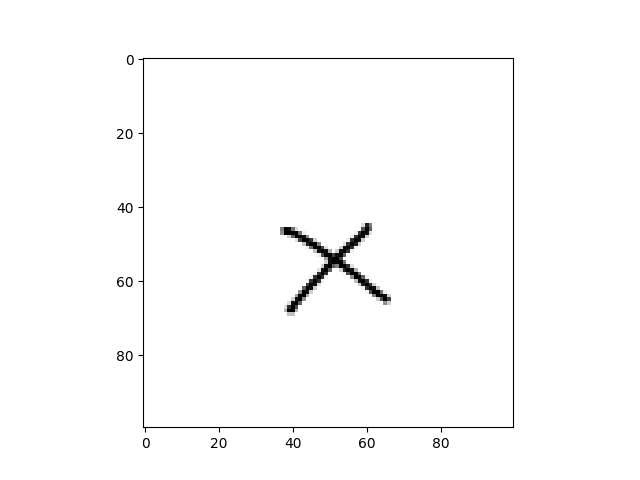

In [253]:
plt.imshow(image, cmap='gray')
plt.show()

Checking the 10x10 resized image before the application of the otsu threshold:

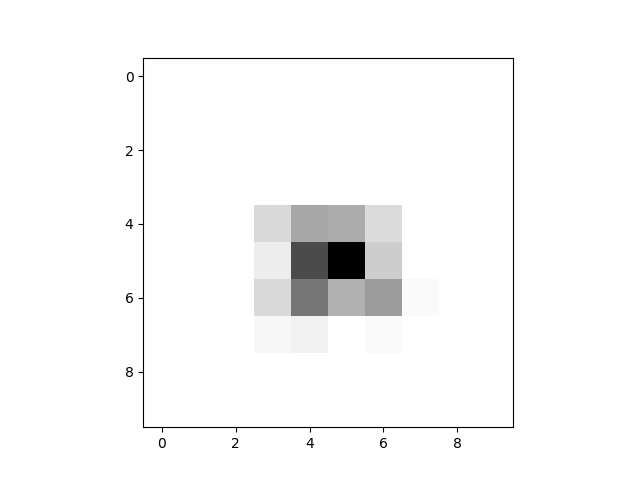

In [254]:
plt.imshow(resized_image, cmap='gray')
plt.show()

Checking the 10x10 image after the application of the otsu threshold:

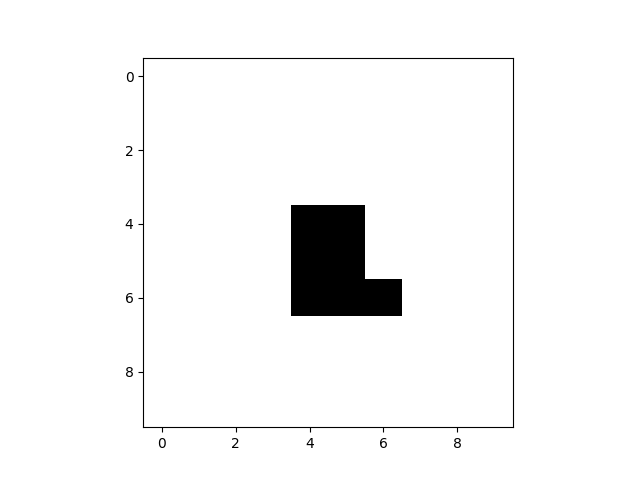

In [255]:
plt.imshow(binary_image, cmap='gray')
plt.show()

Write pandas dataframe to CSV:

In [256]:
# Remove column header and index
df_final.to_csv("../PVA1/csv/patrick.hirschi.csv",header=False,index=False)

## Second Attempt: Pillow module

In [257]:
from PIL import Image

### Binarization Method (Source:  https://predictivehacks.com/iterate-over-image-pixels/)
The following method allows to specify a threshold value (number between 0 and 255). If a given pixel value is greater than the threshold, the pixel is changed to 255 ("white"), and if it is lower than the threshold, it is changed to 0 ("black").

In [258]:
def binarize(image_to_transform, threshold):
    # now, lets convert that image to a single greyscale image using convert()
    output_image=image_to_transform.convert("L")
    # the threshold value is usually provided as a number between 0 and 255, which
    # is the number of bits in a byte.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    for x in range(output_image.width):
        for y in range(output_image.height):
            # for the given pixel at w,h, lets check its value against the threshold
            if output_image.getpixel((x,y))< threshold: #note that the first parameter is actually a tuple object
                # lets set this to zero
                output_image.putpixel( (x,y), 0 )
            else:
                # otherwise lets set this to 255
                output_image.putpixel( (x,y), 255 )
    #now we just return the new image
    return output_image

### Image Processing
Loop through the images in the specified folder, read them with the Pillow module, binarize the image, resize it, and call the binarize method again to ensure a clean output. Because the downscaling is extreme and the output image only consists of 20x20 pixel, we need to select intelligent threshold values to somehow keep the handwritten form of the character (e.g. "x").

In [259]:
# loop through all images in folder
for image_path in glob.glob("../PVA1/img/*.png"):
    # read image file from disk
    image = Image.open(image_path)
    # apply binarization method with threshold 250
    image_binary_gray = binarize(image, 250)
    # resize image to 20x20 pixel with bicubic sampling
    image_binary_gray_resized = image_binary_gray.resize((20, 20),Image.Resampling.BICUBIC)
    # apply binarization method with threshold 140
    image_binary_gray_resized_clean = binarize(image_binary_gray_resized, 140)

Checking the original 100x100 image:

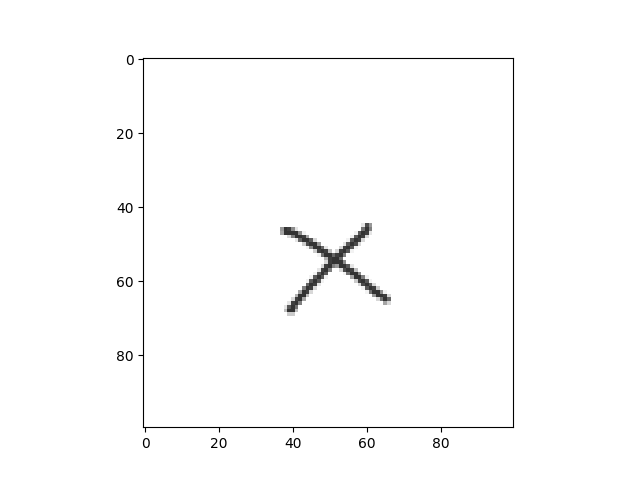

In [260]:
plt.imshow(image, cmap='gray')
plt.show()

Checking the 20x20 resized and binarized image:

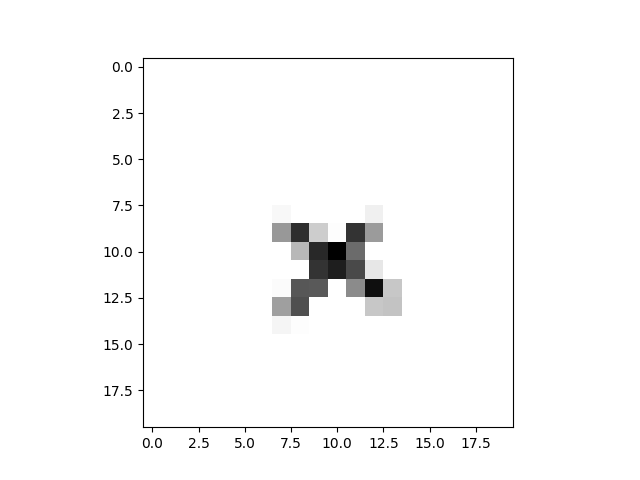

In [261]:
plt.imshow(image_binary_gray_resized, cmap='gray')
plt.show()

Checking the 20x20 image after the second binarization step:

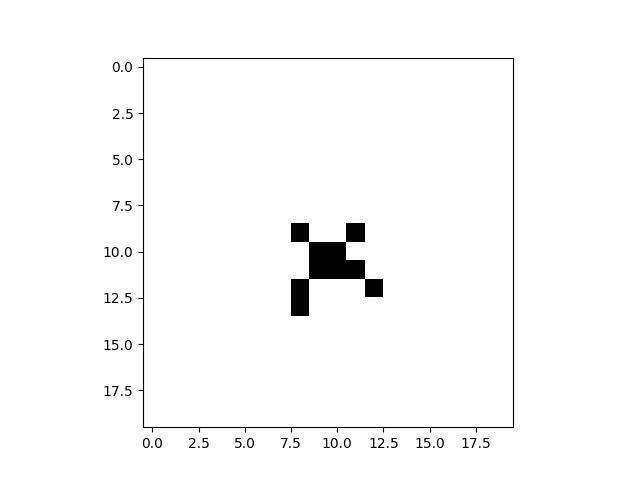

In [262]:
plt.imshow(image_binary_gray_resized_clean, cmap='gray')
plt.show()